# Quora Insincere Questions Classification

In [1]:
#Loading necessary libraries for the classification model implementation using Scikit-learn
import numpy as np 
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import f1_score,classification_report,accuracy_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

#Importing necessary packages for confusion matrix
import mlxtend
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Loading the files into Jupyter notebook
train_data = pd.read_csv('G:/DIT WebCourse/S2/Machine learning/assignment/assignmnt1/datasets/train.csv')
test_data = pd.read_csv('G:/DIT WebCourse/S2/Machine learning/assignment/assignmnt1/datasets/test.csv')

In [4]:
train_data.shape #for identifying the metric size of train data

(1306122, 3)

In [5]:
train_data.head() # for listing initial 5 records used in train data

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
train_data['target'].value_counts() #Identifying the count of train data records based on the target value

0    1225312
1      80810
Name: target, dtype: int64

In [7]:
train_text = train_data['question_text'] #Extracting the text values from train data and assigning to a variable.
test_text = test_data['question_text'] #Extracting the text values from test data and assigning to a variable.
train_target = train_data['target'] #Extracting the target value used in train data.
all_text = train_text.append(test_text) #Appending the texts from train data with test data.

In [8]:
tfidf_vectorizer = TfidfVectorizer() #Using TfidfVectorizer function to convert the raw text sentences to a matrix for feature extraction.
tfidf_vectorizer.fit(all_text) #Passing the all text sentences to the TfidfVectorizer function.

count_vectorizer = CountVectorizer() 
count_vectorizer.fit(all_text) #Using CountVectorizer function to convert texts to word count vectors.

train_text_features_cv = count_vectorizer.transform(train_text) #Passing train data to CountVectorizer method.
test_text_features_cv = count_vectorizer.transform(test_text) #Similarly passing the testdata to CountVectorizer method.

train_text_features_tf = tfidf_vectorizer.transform(train_text) 
test_text_features_tf = tfidf_vectorizer.transform(test_text)

### Logistic regression without processing

In [9]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018) #Using k-fold validation with split value of 5
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features_tf[train_idx,:], train_text_features_tf[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression() # Defining the Logistic regression classifier, train data, test data.
    classifier.fit(x_train,y_train)
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features_tf)[:,1]

In [10]:
pred_train = (oof_preds > .25).astype(np.int)
f1_score(train_target, pred_train) #Finding the f1 score of logistic regression classifier for evaluation
print("Logistic Regression\n")
print(classification_report(train_target, pred_train))


Logistic Regression

             precision    recall  f1-score   support

          0       0.98      0.97      0.97   1225312
          1       0.58      0.66      0.62     80810

avg / total       0.95      0.95      0.95   1306122



In [11]:
print(accuracy_score(train_target, pred_train))

0.949198466911973


### Multinomial and Bernoulli Naive Bayes classifiers without pre- processing

In [12]:

kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018) #Using k-fold validation with split value of 5
test_preds1 = 0
oof_preds1 = np.zeros([train_data.shape[0],])

test_preds2 = 0
oof_preds2 = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features_cv[train_idx,:], train_text_features_cv[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier1 = MultinomialNB() # Defining the Multinomial NaiveBayes classifier, train data, test data.
    classifier2 = BernoulliNB() # Defining the Bernoulli NaiveBayes classifier, train data, test data.
    classifier1.fit(x_train,y_train)
    classifier2.fit(x_train,y_train)
    oof_preds1[valid_idx] = classifier1.predict_proba(x_valid)[:,1]
    test_preds1 += 0.2*classifier1.predict_proba(test_text_features_cv)[:,1]
    oof_preds2[valid_idx] = classifier2.predict_proba(x_valid)[:,1]
    test_preds2 += 0.2*classifier2.predict_proba(test_text_features_cv)[:,1]

In [13]:
pred_train = (oof_preds1 > .3).astype(np.int)
f1_score(train_target, pred_train) #Finding the f1 score of Multinomial NaiveBayes classifier for evaluation.
print("Multinomial Naive Bayes\n")
print(classification_report(train_target, pred_train))

Multinomial Naive Bayes

             precision    recall  f1-score   support

          0       0.98      0.93      0.96   1225312
          1       0.42      0.72      0.53     80810

avg / total       0.95      0.92      0.93   1306122



In [14]:
pred_train = (oof_preds2 > .3).astype(np.int)
f1_score(train_target, pred_train) #Finding the f1 score of Bernoulli NaiveBayes classifier for evaluation.
print("Bernoulli Naive Bayes\n")
print(classification_report(train_target, pred_train))

Bernoulli Naive Bayes

             precision    recall  f1-score   support

          0       0.98      0.95      0.96   1225312
          1       0.45      0.64      0.52     80810

avg / total       0.94      0.93      0.93   1306122



# Cleaning and Processing of datasets

In [15]:
train_data.isnull().sum() #Taking count of nullentries

qid              0
question_text    0
target           0
dtype: int64

In [16]:
#Splitting into words and taking count
train_data['word_count'] = train_data['question_text'].apply(lambda x: len(str(x).split(" ")))
train_data[['question_text','word_count']].head()


,question_text,word_count
0,How did Quebec nationalists see their province...,13
1,"Do you have an adopted dog, how would you enco...",16
2,Why does velocity affect time? Does velocity a...,10
3,How did Otto von Guericke used the Magdeburg h...,9
4,Can I convert montra helicon D to a mountain b...,15


In [17]:
#Word count in test data
test_data['word_count'] = test_data['question_text'].apply(lambda x: len(str(x).split(" ")))
test_data[['question_text','word_count']].head()


,question_text,word_count
0,Why do so many women become so rude and arroga...,21
1,When should I apply for RV college of engineer...,30
2,What is it really like to be a nurse practitio...,10
3,Who are entrepreneurs?,3
4,Is education really making good people nowadays?,7


In [18]:
#Character count in training data
train_data['char_count'] = train_data['question_text'].str.len()
train_data[['question_text','char_count']].head()

,question_text,char_count
0,How did Quebec nationalists see their province...,72
1,"Do you have an adopted dog, how would you enco...",81
2,Why does velocity affect time? Does velocity a...,67
3,How did Otto von Guericke used the Magdeburg h...,57
4,Can I convert montra helicon D to a mountain b...,77


In [19]:
#Character count in test data
test_data['char_count'] = test_data['question_text'].str.len() ## this also includes spaces
test_data[['question_text','char_count']].head()

,question_text,char_count
0,Why do so many women become so rude and arroga...,101
1,When should I apply for RV college of engineer...,162
2,What is it really like to be a nurse practitio...,50
3,Who are entrepreneurs?,22
4,Is education really making good people nowadays?,48


In [20]:
#To lower conversion training data
train_data['question_text'] = train_data['question_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_data['question_text'].head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog, how would you enco...
2    why does velocity affect time? does velocity a...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [21]:
##To lower conversion test data
test_data['question_text'] = test_data['question_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_data['question_text'].head()

0    why do so many women become so rude and arroga...
1    when should i apply for rv college of engineer...
2    what is it really like to be a nurse practitio...
3                               who are entrepreneurs?
4     is education really making good people nowadays?
Name: question_text, dtype: object

In [22]:
#Nullifying everything other than a combination of a word and immediate space
test_data['question_text'] = test_data['question_text'].str.replace('[^\w\s]','')
test_data['question_text'].head()

0    why do so many women become so rude and arroga...
1    when should i apply for rv college of engineer...
2    what is it really like to be a nurse practitioner
3                                who are entrepreneurs
4      is education really making good people nowadays
Name: question_text, dtype: object

In [23]:
#Nullifying everything other than a combination of a word and immediate space
train_data['question_text'] = train_data['question_text'].str.replace('[^\w\s]','')
train_data['question_text'].head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog how would you encou...
2    why does velocity affect time does velocity af...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [24]:
#Finding frequency
freq = pd.Series(' '.join(train_data['question_text']).split()).value_counts()[-20:]
freq

405lbs             1
shinkai            1
18400              1
altmedia           1
canone             1
chochódog          1
wificontrolled     1
tage               1
lifequestions      1
montecristo        1
eos700d750d        1
fossick            1
perpetualmotion    1
carouselslide      1
honed              1
watercourses       1
ecoterrorist       1
highso             1
ortonville         1
crystlyne          1
dtype: int64

In [25]:
freq = list(freq.index)

In [26]:
train_data['question_text'] = train_data['question_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) #Finding those texts which does not contain above words
train_data['question_text'].head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog how would you encou...
2    why does velocity affect time does velocity af...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [27]:
from textblob import TextBlob #Using textblob libraries to correct word spelling.
train_data['question_text'][:5].apply(lambda x: str(TextBlob(x).correct())) #Using textblob into train data
test_data['question_text'][:5].apply(lambda x: str(TextBlob(x).correct())) #Using textblob into test data

0    why do so many women become so rude and arroga...
1    when should i apply for re college of engineer...
2    what is it really like to be a nurse practitioner
3                                who are entrepreneurs
4      is education really making good people nowadays
Name: question_text, dtype: object

In [28]:
from textblob import Word
#Using lemmatization to process grouping of those words which resembles the same using train data.
#To perform lemmatization using TextBlob,the Word object has to be used from the textblob library and it should be passed with word that you want to lemmatize
train_data['question_text'] = train_data['question_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#the word attribute returns the tokenized words
train_data['question_text'].head()

0    how did quebec nationalist see their province ...
1    do you have an adopted dog how would you encou...
2    why doe velocity affect time doe velocity affe...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [29]:
#Using lemmatization to process grouping of those words which resembles the same using test data.
test_data['question_text'] = test_data['question_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#the word attribute returns the tokenized words
test_data['question_text'].head()

0    why do so many woman become so rude and arroga...
1    when should i apply for rv college of engineer...
2    what is it really like to be a nurse practitioner
3                                 who are entrepreneur
4      is education really making good people nowadays
Name: question_text, dtype: object

In [30]:
test_data.head() #displaying the test data 

,qid,question_text,word_count,char_count
0,0000163e3ea7c7a74cd7,why do so many woman become so rude and arroga...,21,101
1,00002bd4fb5d505b9161,when should i apply for rv college of engineer...,30,162
2,00007756b4a147d2b0b3,what is it really like to be a nurse practitioner,10,50
3,000086e4b7e1c7146103,who are entrepreneur,3,22
4,0000c4c3fbe8785a3090,is education really making good people nowadays,7,48


In [31]:
import nltk
nltk.download('stopwords')

# Importing stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#Removing stop words from both the datasets
train_data['question_text'] = train_data['question_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_data['question_text'] = test_data['question_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_data['question_text'].head()
test_data['question_text'].head()

0    many woman become rude arrogant get little bit...
1    apply rv college engineering bm college engine...
2                       really like nurse practitioner
3                                         entrepreneur
4         education really making good people nowadays
Name: question_text, dtype: object

### Under Sampling

In [33]:
#Percentage of sincere and non sincere questions
Count_Sincere_Questions = len(train_data[train_data["target"]==0]) 
Count_Insincere_Questions = len(train_data[train_data["target"]==1]) 
Percentage_of_Sincere_Questions = Count_Sincere_Questions/(Count_Sincere_Questions+Count_Insincere_Questions)
print("Percentage of Sincere Questions (value=0) is",Percentage_of_Sincere_Questions*100)
Percentage_of_Insincere_Questions= Count_Insincere_Questions/(Count_Sincere_Questions+Count_Insincere_Questions)
print("Percentage of Nonsincere Questions (value=1) is",Percentage_of_Insincere_Questions*100)

Percentage of Sincere Questions (value=0) is 93.81298224821265
Percentage of Nonsincere Questions (value=1) is 6.187017751787352


In [34]:
#Collecting the sincere and insincee question indices
insincere_indices= np.array(train_data[train_data.target==1].index)
normal_indices = np.array(train_data[train_data.target==0].index)

In [35]:
#Defining a function to do undersampling. 'times' passed indicates percentage to be undersampled
#Sincere_Data = times*Insincere_Data
def undersample(normal_indices,insincere_indices,times):
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Insincere_Questions),replace=False))
    print(len(Normal_indices_undersample))
    undersample_data= np.concatenate([insincere_indices,Normal_indices_undersample])

    undersample_data = train_data.iloc[undersample_data,:]
    print(len(undersample_data))

    print("the sincere questions proportion is :",len(undersample_data[undersample_data.target==0])/len(undersample_data))
    print("the insincere questions proportion is :",len(undersample_data[undersample_data.target==1])/len(undersample_data))
    print("total number of record in resampled data is:",len(undersample_data))
    return(undersample_data)

In [36]:
#calling the function and undersampling
Undersample_data = undersample(normal_indices,insincere_indices,9)
Undersample_data.info()

727290
808100
the sincere questions proportion is : 0.9
the insincere questions proportion is : 0.1
total number of record in resampled data is: 808100
<class 'pandas.core.frame.DataFrame'>
Int64Index: 808100 entries, 22 to 234800
Data columns (total 5 columns):
qid              808100 non-null object
question_text    808100 non-null object
target           808100 non-null int64
word_count       808100 non-null int64
char_count       808100 non-null int64
dtypes: int64(3), object(2)
memory usage: 37.0+ MB


Sincere (0) vs Insincere (1) before under sampling


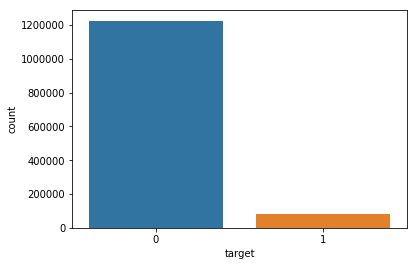

In [37]:
import seaborn as sns # for interactve graphs
#proportion of sincere and insincere data before undersampling
print("Sincere (0) vs Insincere (1) before under sampling")
sns.countplot("target",data=train_data)

Sincere (0) vs Insincere (1) after under sampling


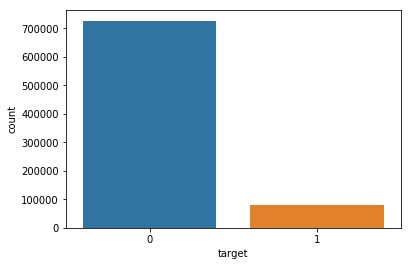

In [38]:
#proportion of sincere and insincere data after undersampling
print("Sincere (0) vs Insincere (1) after under sampling")
sns.countplot("target",data=Undersample_data)

# Models after data processing and under sampling

In [39]:
#Assigning the processed texts to respective train set and test set
Undersample_data = Undersample_data.reset_index()
train_text = Undersample_data['question_text']
test_text = test_data['question_text']
train_target = Undersample_data['target']
all_text = train_text.append(test_text)


In [40]:
tfidf_vectorizer = TfidfVectorizer() #Using TfidfVectorizer function to convert the raw text sentences to a matrix for feature extraction.
tfidf_vectorizer.fit(all_text) #Passing the all text sentences to the TfidfVectorizer function.

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text) #Using CountVectorizer function to convert texts to word count vectors.

train_text_features_cv = count_vectorizer.transform(train_text) #Passing train data to CountVectorizer method.
test_text_features_cv = count_vectorizer.transform(test_text) #Similarly passing the testdata to CountVectorizer method.

train_text_features_tf = tfidf_vectorizer.transform(train_text)
test_text_features_tf = tfidf_vectorizer.transform(test_text)

### Logistic Regression

In [73]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018) #Using k-fold validation with split value of 5
test_preds = 0
oof_preds = np.zeros([Undersample_data.shape[0],])

In [74]:
for i, (train_idx,valid_idx) in enumerate(kfold.split(Undersample_data)):
    x_train, x_valid = train_text_features_tf[train_idx,:], train_text_features_tf[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression() # Defining the Logistic regression classifier, train data, test data.
    print('fitting.......')
    classifier.fit(x_train,y_train)
    print('predicting......')
    print('\n')
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1] #Using predict_proba as the function which provides the probability for the target value in array form
    test_preds += 0.2*classifier.predict_proba(test_text_features_tf)[:,1] 

pred_train = (oof_preds > .3).astype(np.int)
f1_score(train_target, pred_train) #Obtaining the f1 score of classifier

fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......




0.6513435243227391

In [75]:
print("Logistic regression after data processing and under sampling\n")
print(classification_report(train_target, pred_train))#Displaying the classification report of the classifier

Logistic regression after data processing and under sampling

             precision    recall  f1-score   support

          0       0.96      0.96      0.96    727290
          1       0.64      0.66      0.65     80810

avg / total       0.93      0.93      0.93    808100



In [76]:
cm = confusion_matrix(train_target,pred_train) #Displaying the confusion matrix
cm

array([[697730,  29560],
       [ 27506,  53304]], dtype=int64)

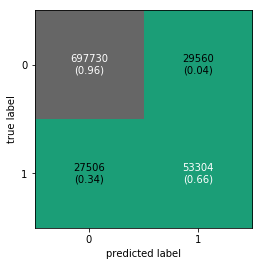

In [79]:
binary = np.array(cm)
ax = plot_confusion_matrix(conf_mat=binary,show_absolute=True,
                                show_normed=True,
                                colorbar=False)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
plt.show() #Pictorial representation of confusion matrix with prcentage values

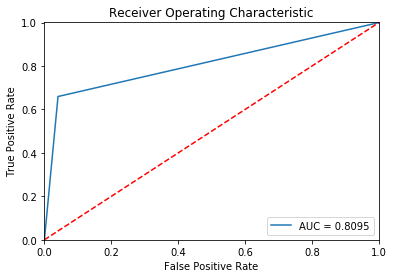

In [46]:
fpr, tpr, thresholds = roc_curve(train_target,pred_train)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

### Naive Bayes With processing and under sampling

In [69]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018) #Using k-fold validation with split value of 5
test_preds1 = 0
oof_preds1 = np.zeros([Undersample_data.shape[0],])
test_preds2 = 0
oof_preds2 = np.zeros([Undersample_data.shape[0],])


for i, (train_idx, valid_idx) in enumerate(kfold.split(Undersample_data)):
    x_train, x_valid = train_text_features_cv[train_idx,:],train_text_features_cv[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier1 = MultinomialNB() # Defining the Multinomial NB classifier, train data, test data.
    classifier2 = BernoulliNB() # Defining the Bernoulli NB classifier, train data, test data.
    print('fitting.......')
    classifier1.fit(x_train,y_train)
    classifier2.fit(x_train,y_train)
    print('predicting......')
    print('\n')
    
    oof_preds1[valid_idx] = classifier1.predict_proba(x_valid)[:,1] #Using predict_proba as the function which provides the probability for the target value in array form
    test_preds1 += 0.2*classifier1.predict_proba(test_text_features_cv)[:,1]
    oof_preds2[valid_idx] = classifier2.predict_proba(x_valid)[:,1]
    test_preds2 += 0.2*classifier2.predict_proba(test_text_features_cv)[:,1]

pred_train = (oof_preds1 > .3).astype(np.int)
f1_score(train_target, pred_train) #Obtaining the f1 score of classifier1

fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......




0.5897171010807375

In [70]:
print("Multinomial Naive Bayes after data processing and under sampling\n")
print(classification_report(train_target, pred_train))#Displaying the classification report of the classifier

Multinomial Naive Bayes after data processing and under sampling

             precision    recall  f1-score   support

          0       0.97      0.92      0.94    727290
          1       0.49      0.73      0.59     80810

avg / total       0.92      0.90      0.91    808100



In [71]:
cm = confusion_matrix(train_target,pred_train) #Displaying the confusion matrix
cm

array([[666124,  61166],
       [ 21442,  59368]], dtype=int64)

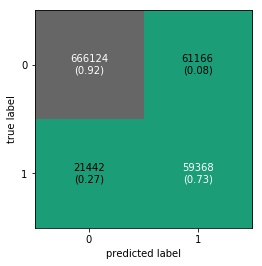

In [72]:
binary = np.array(cm)
ax = plot_confusion_matrix(conf_mat=binary,show_absolute=True,
                                show_normed=True,
                                colorbar=False)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
plt.show() #Pictorial representation of confusion matrix with prcentage values

In [51]:
pred_train = (oof_preds2 > .3).astype(np.int)
f1_score(train_target, pred_train) #Obtaining the f1 score of classifier1

0.5911034809522929

In [52]:
print("Bernoulli Naive Bayes after data processing and under sampling\n")
print(classification_report(train_target, pred_train))#Displaying the classification report of the classifier

Bernoulli Naive Bayes after data processing and under sampling

             precision    recall  f1-score   support

          0       0.95      0.95      0.95    727290
          1       0.59      0.59      0.59     80810

avg / total       0.92      0.92      0.92    808100



In [53]:
cm = confusion_matrix(train_target,pred_train) #Displaying the confusion matrix of classifier2
cm

array([[693618,  33672],
       [ 32779,  48031]], dtype=int64)

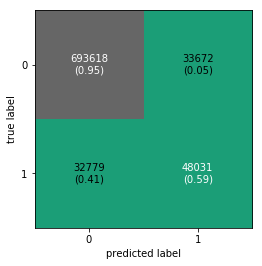

In [68]:
binary = np.array(cm)
ax = plot_confusion_matrix(conf_mat=binary,show_absolute=True,
                                show_normed=True,
                                colorbar=False)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
plt.show() #Pictorial representation of confusion matrix with prcentage values